In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.tsa.api as sm#如果后面代码有问题，就运行pip install statsmodels --upgrade  然后重启，更新一下这个包
import warnings
warnings.filterwarnings("ignore")

In [45]:
import statsmodels
statsmodels.__version__

'0.13.2'

In [37]:
#读取数据
data=pd.read_excel("data/手机销量.xlsx",header=0)
data.head()

,季度,华为,vivo,oppo,小米,苹果,荣耀
0,2018一季度,21.2,15.4,17.5,12.1,9.3,NaN
1,2018二季度,28.5,19.9,21.2,14.5,7.0,NaN
2,2018三季度,25.2,22.3,21.0,14.0,7.6,NaN
3,2018四季度,30.0,18.5,18.7,9.4,11.5,NaN
4,2019一季度,29.9,15.0,16.8,10.5,6.5,NaN


In [38]:
#设置日期
date=pd.date_range(start='3/2018', end='4/2022',freq="3M")
data["日期"]=date
data=data.set_index("日期")
data

,季度,华为,vivo,oppo,小米,苹果,荣耀
日期,,,,,,,
2018-03-31,2018一季度,21.20,15.4,17.5,12.1,9.3,NaN
2018-06-30,2018二季度,28.50,19.9,21.2,14.5,7.0,NaN
2018-09-30,2018三季度,25.20,22.3,21.0,14.0,7.6,NaN
2018-12-31,2018四季度,30.00,18.5,18.7,9.4,11.5,NaN
2019-03-31,2019一季度,29.90,15.0,16.8,10.5,6.5,NaN
2019-06-30,2019二季度,36.30,18.3,18.2,11.7,6.6,NaN
2019-09-30,2019三季度,41.50,18.1,16.4,9.7,8.1,NaN
2019-12-31,2019四季度,33.30,13.1,14.0,8.1,10.1,NaN
2020-03-31,2020一季度,30.10,12.1,12.5,7.8,6.2,14.66


In [39]:
#单位根检验,返回的具体值可参考 https://blog.csdn.net/orDream/article/details/100038076
print(sm.adfuller(data.华为))
print(sm.adfuller(data.小米))
print(sm.adfuller(data.苹果))
print(sm.adfuller(data.oppo))
print(sm.adfuller(data.vivo))

(-1.7824086402347368, 0.38922962397253735, 6, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 60.98266052701621)
(-2.40947231203447, 0.1390807474470815, 6, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 38.39721274111508)
(-1.8303141825530325, 0.36551875611976625, 6, 10, {'1%': -4.331573, '5%': -3.23295, '10%': -2.7487}, 53.30688609823879)
(-2.0142537652189283, 0.28035850234903126, 3, 13, {'1%': -4.068853732362312, '5%': -3.1271488757396453, '10%': -2.7017297633136095}, 42.26843639768266)
(-2.2190484177740886, 0.1994047580698789, 4, 12, {'1%': -4.137829282407408, '5%': -3.1549724074074077, '10%': -2.7144769444444443}, 38.921303149093504)


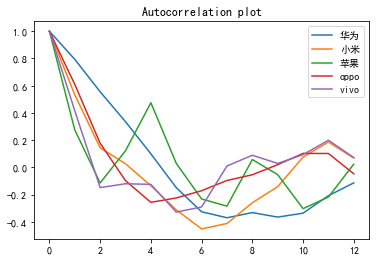

In [40]:
#计算自相关系数和画图
plt.rcParams['axes.unicode_minus'] = False#设置负的坐标轴显示
plt.rcParams["font.family"] = "SimHei" # 设置全局中文字体为黑体
acf1=sm.acf(data.华为)
acf2=sm.acf(data.小米)
acf3=sm.acf(data.苹果)
acf4=sm.acf(data.oppo)
acf5=sm.acf(data.vivo)
plt.plot(acf1)
plt.plot(acf2)
plt.plot(acf3)
plt.plot(acf4)
plt.plot(acf5)
plt.title("Autocorrelation plot")
plt.legend(["华为","小米","苹果","oppo","vivo"])
plt.show()

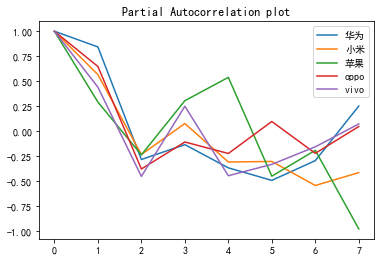

In [41]:
#计算偏自相关系数和画图
pacf1=sm.pacf(data.华为)
pacf2=sm.pacf(data.小米)
pacf3=sm.pacf(data.苹果)
pacf4=sm.pacf(data.oppo)
pacf5=sm.pacf(data.vivo)
plt.plot(pacf1)
plt.plot(pacf2)
plt.plot(pacf3)
plt.plot(pacf4)
plt.plot(pacf5)
plt.title("Partial Autocorrelation plot")
plt.legend(["华为","小米","苹果","oppo","vivo"])
plt.show()

### 建立ARMA模型
![](ARMA定阶问题.png)

In [42]:
arma_models=sm.ARIMA(data.华为,order=(2,0,2)).fit()#这里是ARMA(2,2)模型
print(arma_models.summary())

                               SARIMAX Results                                
Dep. Variable:                     华为   No. Observations:                   17
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -54.216
Date:                Mon, 23 May 2022   AIC                            120.431
Time:                        23:19:08   BIC                            125.430
Sample:                    03-31-2018   HQIC                           120.928
                         - 03-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4292     16.926      1.148      0.251     -13.745      52.603
ar.L1          0.6044      2.548      0.237      0.812      -4.389       5.598
ar.L2          0.1766      2.022      0.087      0.9

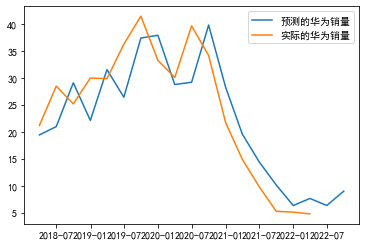

In [43]:
#做预测
pre=arma_models.predict(0,18)
plt.plot(pre)
plt.plot(data.华为)
plt.legend(["预测的华为销量","实际的华为销量"])
plt.show()

In [44]:
#预测的华为手机销量，预测了下连个月的
pre

2018-03-31    19.429220
2018-06-30    20.980160
2018-09-30    29.122072
2018-12-31    22.126974
2019-03-31    31.574555
2019-06-30    26.439716
2019-09-30    37.448474
2019-12-31    37.959048
2020-03-31    28.802398
2020-06-30    29.222530
2020-09-30    39.863021
2020-12-31    28.267836
2021-03-31    19.577565
2021-06-30    14.423088
2021-09-30    10.127714
2021-12-31     6.297667
2022-03-31     7.617220
2022-06-30     6.306057
2022-09-30     8.971416
Freq: Q-DEC, Name: predicted_mean, dtype: float64

In [26]:
import pandas as pd
import funcy

In [49]:
Y=pd.read_excel('/Users/apple/Desktop/Y=出生率.xlsx')
X=pd.read_excel('/Users/apple/Desktop/X=人均可支配收入.xlsx')
X1=pd.read_excel('/Users/apple/Desktop/X1=常住人口.xlsx')
X2=pd.read_excel('/Users/apple/Desktop/X2=房价.xlsx')

In [50]:
Y.地区=Y.地区.ffill()

In [51]:
Y.head()

,地区,城市,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,东部,北京,8.29,9.05,8.93,9.75,7.96,9.32,9.06,8.24,8.12
1,东部,上海,6.97,9.56,8.18,8.35,7.52,9.00,8.10,7.20,7.00
2,东部,天津,8.58,8.75,8.28,9.50,5.84,7.37,7.65,6.67,6.73
3,东部,沈阳,7.70,6.70,8.00,9.87,6.70,9.48,8.90,8.10,8.35
4,东部,石家庄,12.80,12.54,12.91,13.35,11.35,11.35,11.35,13.40,10.60


In [52]:
data=Y[[2011,2012,2013,2014,2015,2016,2017,2018,2019]].stack()

In [53]:
城市=[[s]*9 for s in list(Y.城市)]
城市=list(funcy.flatten(城市))
地区=[[s]*9 for s in list(Y.地区)]
地区=list(funcy.flatten(地区))
年份=list(range(2011,2020))*31

In [54]:
data_all=pd.DataFrame({'地区':地区,'城市':城市,'年份':年份,'出生率':data.values})

In [55]:
data_all

,地区,城市,年份,出生率
0,东部,北京,2011,8.29
1,东部,北京,2012,9.05
2,东部,北京,2013,8.93
3,东部,北京,2014,9.75
4,东部,北京,2015,7.96
...,...,...,...,...
274,西部,重庆,2015,11.07
275,西部,重庆,2016,11.26
276,西部,重庆,2017,12.12
277,西部,重庆,2018,10.57


In [56]:
X=X[[2011,2012,2013,2014,2015,2016,2017,2018,2019]].stack().values
X1=X1[[2011,2012,2013,2014,2015,2016,2017,2018,2019]].stack().values
X2=X2[[2011,2012,2013,2014,2015,2016,2017,2018,2019]].stack().values
data_all['人均可支配收入']=X
data_all['常住人口']=X1
data_all['房价']=X2

In [57]:
data_all.isna().sum()

地区         0
城市         0
年份         0
出生率        0
人均可支配收入    0
常住人口       0
房价         0
dtype: int64

In [58]:
data_all.to_excel('/Users/apple/Desktop/数据.xlsx',index=False)

In [43]:
data_all.城市=list(funcy.flatten([[s]*9 for s in list(range(1,32))]))

In [44]:
data_all.to_excel('/Users/apple/Desktop/数据.xlsx',index=False)